## Looking Into Automotives: EDA & Trading Strategy

In this project, I will be performing an exploratory data analysis (EDA) on a collection of stocks. particularly those in the automotive industry. More specifically, the stocks that I will be looking into will be Lucid Group Inc. (LCID), General Motors (GM), and NIO Inc. (NIO).
Upon completing the EDA, I will be running a trading strategy on one of the stocks to determine the appropriate buy and sell signals.


<b>Part 1: Exploratory Data Analysis (EDA)<b>

In [407]:
#import necessary libraries and packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [408]:
#Desired Time Frame: August 2021-January 2022
start_date = "2020-01-01"
end_date = "2022-01-01"

#Make df for each of the automotive tickers we need;
gm_df = yf.download('GM', start_date, end_date)
nio_df = yf.download('NIO', start_date, end_date)
combined_close_price_df['LCID Close'] = lcid_df.Close

#Check if worked correctly
nio_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,4.10,4.10,3.61,3.72,3.72,103740100
2020-01-03,3.50,3.90,3.48,3.83,3.83,82892400
2020-01-06,4.19,4.24,3.66,3.68,3.68,106619700
2020-01-07,3.70,3.73,3.21,3.24,3.24,106336400
2020-01-08,3.14,3.49,3.13,3.39,3.39,65118100


Let's begin by plotting the closing prices of the tickers.

Text(0, 0.5, 'Closing Price')

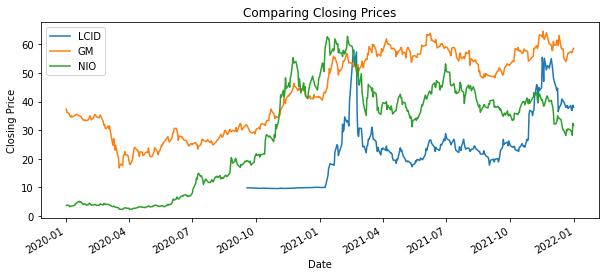

In [409]:
lcid_df.Close.plot(label = "LCID", figsize = (10,4))
gm_df.Close.plot(label = "GM")
nio_df.Close.plot(label = "NIO")
plt.legend()
plt.title("Comparing Closing Prices")
plt.ylabel("Closing Price")

Now, let's show this graph in a df format.

In [410]:
combined_close_price_df = pd.DataFrame()
combined_close_price_df['GM Close'] = gm_df.Close
combined_close_price_df['NIO Close'] = nio_df.Close
combined_close_price_df['LCID Close'] = lcid_df.Close
combined_close_price_df.head()

,GM Close,NIO Close,LCID Close
Date,,,
2020-01-02,37.380001,3.72,NaN
2020-01-03,36.320000,3.83,NaN
2020-01-06,35.840000,3.68,NaN
2020-01-07,35.150002,3.24,NaN
2020-01-08,34.650002,3.39,NaN


In [411]:
#Due to the NaN values, we will modify combined_close_df 
combined_close_price_df = combined_close_price_df.dropna()
combined_close_price_df

,GM Close,NIO Close,LCID Close
Date,,,
2020-09-18,31.500000,19.410000,9.890000
2020-09-21,30.000000,18.809999,9.860000
2020-09-22,29.440001,19.230000,9.880000
2020-09-23,29.340000,17.959999,9.850000
2020-09-24,29.110001,17.850000,9.770000
...,...,...,...
2021-12-27,57.430000,29.959999,38.639999
2021-12-28,57.110001,29.629999,36.980000
2021-12-29,57.230000,28.250000,36.970001


In [412]:
#Highest Closing Price
print("GM Highest Close:", combined_close_price_df['GM Close'].max())
print("NIO Highest Close:", combined_close_price_df['NIO Close'].max())
print("Lucid Highest Close:", combined_close_price_df['LCID Close'].max())

GM Highest Close: 64.61000061035156
NIO Highest Close: 62.84000015258789
Lucid Highest Close: 58.04999923706055


<b>General Observation:</b> 
The closing price trends differ between the stocks. For instance, compared to the other stocks, GM has experienced (for the most part) a steady rise from April 2020 to January 2021. However, the same cannot be said with the Chinese automobile manufacturer NIO, which experienced an increase in closing price up until January 2021, after which it began to see a decline in its closing price. Lucid itself saw a large drop in its closing price in February 2021. However, the stock's closing price began rising towards the end of 2021.

<b> Examining Volume </b>

Volume (# of shares traded) provides an understanding of the momentum of a security. A greater volume indicates more buying pressure, leading to higher prices (due to greater demand). I wanted to examine this relationship further by plotting the volume of the tickers above.

Text(0, 0.5, 'Volume')

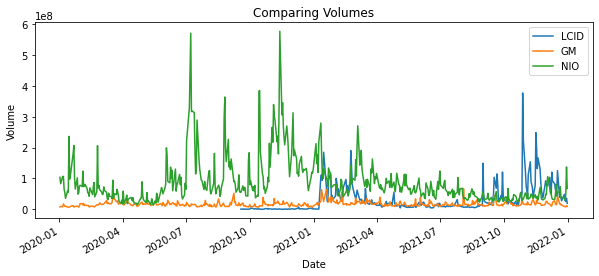

In [413]:
lcid_df.Volume.plot(label = "LCID", figsize = (10,4))
gm_df.Volume.plot(label = "GM")
nio_df.Volume.plot(label = "NIO")
plt.legend()
plt.title("Comparing Volumes")
plt.ylabel("Volume")

In [414]:
#NIO has the highest volume traded out of all the stocks. Let's find
#find the value of the largest volume as well as the date it occured.

nio_max_vol = nio_df.Volume.max()
nio_date_max_vol = nio_df.Volume.idxmax()
print("NIO's highest traded volume was", str(nio_max_vol) + ". This occured on",
    str (nio_date_max_vol))

NIO's highest traded volume was 577185100. This occured on 2020-11-13 00:00:00


In [415]:
#Despite its peak volume in November 2020, NIO's volume has greatly decreased.
#Let's find Nio's smallest volume after the date of the largest volume (11/13/2020)

nio_min_vol = nio_df.Volume[nio_date_max_vol:].min()
print("NIO's lowest volume after 11/13/2020 is", str(nio_min_vol)+ ". This occured on",
      str(nio_df.Volume[nio_date_max_vol:].idxmin()))


NIO's lowest volume after 11/13/2020 is 22885100. This occured on 2021-10-06 00:00:00


<b>Some Observations:</b> Despite having the larger closer price than NIO and Lucid, GM stock had the lowest
volume. However, I was mainly interested in NIO's volume due to the its declining closing price, as shown in the closing
price plot earlier in this notebook. NIO's highest volume was recorded as 5.77e8 shares traded, which took place on November 11, 2020. Following this date, the volume has decreased, reaching a low of 2.29e8 shares traded on October 6, 2021.

A lower volume indicates less of a demand for a stock, leading to lower prices. This is reflected in the closing price graph as the closing price of NIO has been steadily declining since the start of 2021.

<b> Returns</b>

For the final part of the EDA, I will be examining the historic returns of the stocks. I will be looking into the daily returns in particular

In [416]:
#Create df of Daily Returns
returns_df = pd.DataFrame()
returns_df['LCID'] = lcid_df['Close'].pct_change().dropna()
returns_df['NIO'] = nio_df['Close'].pct_change().dropna()
returns_df['GM'] = gm_df['Close'].pct_change().dropna()
returns_df.head()

,LCID,NIO,GM
Date,,,
2020-09-21,-0.003033,-0.030912,-0.047619
2020-09-22,0.002028,0.022329,-0.018667
2020-09-23,-0.003036,-0.066043,-0.003397
2020-09-24,-0.008122,-0.006125,-0.007839
2020-09-25,0.004094,0.026330,-0.003779


Returns provide us insight into the volatility of a stock. If we plot a histogram of the returns for a specific stock, a larger spread indicates that there is more volatility.

Text(0.5, 1.0, 'LCID Returns')

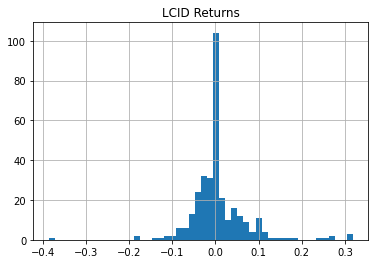

In [417]:
#Plot Histograms
returns_df['LCID'].hist(bins = 50)
plt.title("LCID Returns")

<AxesSubplot:xlabel='Date'>

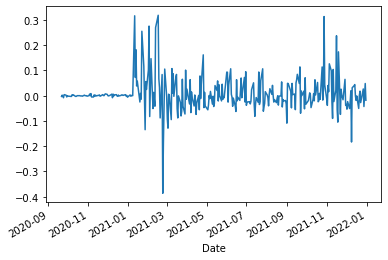

In [418]:
#While many of the returns are centered around -0.1 to 0.1, there are outliers. For instance,
#some of the returns are -0.4 while others are 0.3. Let's look at another plot for LCID's returns
returns_df['LCID'].plot()

Text(0.5, 1.0, 'NIO Returns')

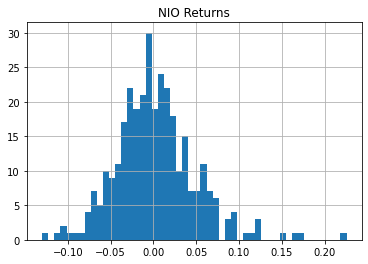

In [419]:
returns_df['NIO'].hist(bins = 50)
plt.title("NIO Returns")

<AxesSubplot:xlabel='Date'>

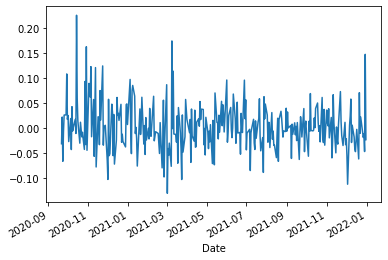

In [420]:
#NIO has a large spread. To have a closer look at its volatility, we will plot
#a line plot of the returns.
returns_df['NIO'].plot()

Text(0.5, 1.0, 'GM Returns')

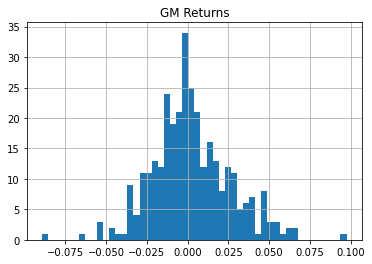

In [421]:
returns_df['GM'].hist(bins = 50)
plt.title("GM Returns")

<b>Histogram Observations:</b> Looking at the histograms above, it can clearly bee seen that NIO and LCID are the most volatile out of the tickers that were examined. This is reflected in their closing price graphs as both tickers experience either a large decline or large spike in their closing price.
Now that I've looked at the returns, my EDA has been completed. We will now move on to the next and final section: Developing a trading strategy.

<b>Part 2: Developing A Trading Strategy </b>

For the final part of this notebook, I will develop a trading strategy for the one of the stocks above. The stock that I will creating a strategy for will be Nio. As indicated by the plots/graphs in the earlier section, Nio is a volatile stock and will require appropriate indicators of when to buy and sell. I the trading strategy that I will be developing is a mean reversion strategy.

In short, a mean reversion strategy aims to capture profit as the price of a stock/asset returns to its long-term average price. Let's start creating one! 

To start, I will modify the nio_df created at the beginning of this notebook so that it contains a column for the returns and a column for a 21 day moving average of the closing price. I chose to do a 21 day moving average since 21 days is the average number of trading days per month.

In [422]:
nio_df['Returns'] = nio_df['Close'].pct_change()
nio_df['Moving Avg'] = nio_df['Close'].rolling(21).mean()
nio_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Moving Avg
Date,,,,,,,,
2020-01-02,4.10,4.10,3.61,3.72,3.72,103740100,NaN,NaN
2020-01-03,3.50,3.90,3.48,3.83,3.83,82892400,0.029570,NaN
2020-01-06,4.19,4.24,3.66,3.68,3.68,106619700,-0.039164,NaN
2020-01-07,3.70,3.73,3.21,3.24,3.24,106336400,-0.119565,NaN
2020-01-08,3.14,3.49,3.13,3.39,3.39,65118100,0.046296,NaN


In [423]:
#Drop Unnecessary columns
nio_df = nio_df.drop(columns = ['Open', 'High', 'Low', 'Volume'])
nio_df.head()

,Close,Adj Close,Returns,Moving Avg
Date,,,,
2020-01-02,3.72,3.72,NaN,NaN
2020-01-03,3.83,3.83,0.029570,NaN
2020-01-06,3.68,3.68,-0.039164,NaN
2020-01-07,3.24,3.24,-0.119565,NaN
2020-01-08,3.39,3.39,0.046296,NaN


Next, I will create another column, titled as "Ratio". This column will tell us how far the closing price is from the moving average. Based on the ratio, we can determine the appropriate trading signals.

In [424]:
#This ratio column will give us an idea of how far the closing price is from the moving average
nio_df['Ratio'] = nio_df['Close']/nio_df['Moving Avg']

In [425]:
#We can learn more about the ratio column by using the describe() method
nio_df['Ratio'].describe()

count    485.000000
mean       1.046937
std        0.163739
min        0.660668
25%        0.941498
50%        1.018243
75%        1.115308
max        1.764431
Name: Ratio, dtype: float64

As shown in the description above, the mean of the ratio between the closing price and the 21 day moving average is 1.0469. This means that on average, the closing price is 4.69% above the moving average. Upon looking at the percentiles, we can see that at the 25th percentile, the closing price is roughly 6% below the moving average and at the 75th percentile, it is 11.53% above the moving average. 

I wanted to see how the percentiles looked like on a graph of the ratio, so I did the following:

Text(0.5, 1.0, 'Ratio')

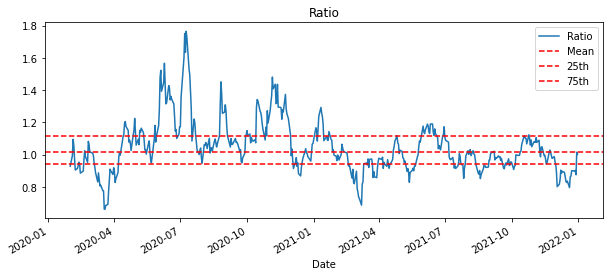

In [426]:
nio_df['Ratio'].plot(figsize = (10,4))

#Add horizontal lines that represent the percentiles
plt.axhline(y = np.percentile(nio_df['Ratio'].dropna(), 50), color ="red", linestyle ="--", label = "Mean")
plt.axhline(y = np.percentile(nio_df['Ratio'].dropna(), 25), color ="red", linestyle ="--", label = "25th")
plt.axhline(y = np.percentile(nio_df['Ratio'].dropna(), 75), color ="red", linestyle ="--", label = "75th")
plt.legend()
plt.title("Ratio")



Looking at the graph above, I felt that the 25th percentiles and the 75th percentiles were not proper indicators of when the closing price would return back to its mean. For this reason, I decided to change the intervals to be the 10th and the 95th percentiles. Here is the modified graph:

Text(0.5, 1.0, 'Ratio')

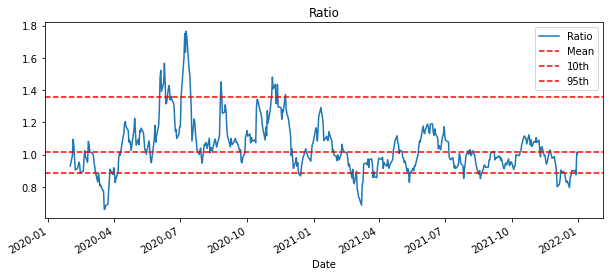

In [427]:
nio_df['Ratio'].plot(figsize = (10,4))

#Add horizontal lines that represent the percentiles
plt.axhline(y = np.percentile(nio_df['Ratio'].dropna(), 50), color ="red", linestyle ="--", label = "Mean")
plt.axhline(y = np.percentile(nio_df['Ratio'].dropna(), 10), color ="red", linestyle ="--", label = "10th")
plt.axhline(y = np.percentile(nio_df['Ratio'].dropna(), 95), color ="red", linestyle ="--", label = "95th")
plt.legend()
plt.title("Ratio")

After looking at the graph, I thought that the 10th and 95th percentiles were better. So, I decided to use these percentiles for the trading strategy.

In [428]:
#Strategy Creation
#We short at the 95th percentile because this is where the ratio will reach a peak and then drop down.
short =  np.percentile(nio_df['Ratio'].dropna(), 95)

#We long at the 10th percentile since this is where the ratio will reach a low and then rise up
long = np.percentile(nio_df['Ratio'].dropna(), 10)

#Add column to nio_df called Position. Fill position with 1's (for long) and -1 for short
nio_df['Position'] = np.where(nio_df['Ratio'] > short, -1, np.nan)
nio_df['Position'] = np.where(nio_df['Ratio'] < long, 1, nio_df['Position'])
nio_df

,Close,Adj Close,Returns,Moving Avg,Ratio,Position
Date,,,,,,
2020-01-02,3.720000,3.720000,NaN,NaN,NaN,NaN
2020-01-03,3.830000,3.830000,0.029570,NaN,NaN,NaN
2020-01-06,3.680000,3.680000,-0.039164,NaN,NaN,NaN
2020-01-07,3.240000,3.240000,-0.119565,NaN,NaN,NaN
2020-01-08,3.390000,3.390000,0.046296,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-27,29.959999,29.959999,-0.018349,33.358571,0.898120,NaN
2021-12-28,29.629999,29.629999,-0.011015,32.865238,0.901560,NaN
2021-12-29,28.250000,28.250000,-0.046574,32.283809,0.875052,1.0


As of now, we are only taking a position above the short ratio and below the long ratio. Everything else appears as NaN. For this reason, we will forward fill so that we are always making a trade.

In [430]:
nio_df['Position'] = nio_df['Position'].ffill()
nio_df

,Close,Adj Close,Returns,Moving Avg,Ratio,Position
Date,,,,,,
2020-01-02,3.720000,3.720000,NaN,NaN,NaN,NaN
2020-01-03,3.830000,3.830000,0.029570,NaN,NaN,NaN
2020-01-06,3.680000,3.680000,-0.039164,NaN,NaN,NaN
2020-01-07,3.240000,3.240000,-0.119565,NaN,NaN,NaN
2020-01-08,3.390000,3.390000,0.046296,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-27,29.959999,29.959999,-0.018349,33.358571,0.898120,1.0
2021-12-28,29.629999,29.629999,-0.011015,32.865238,0.901560,1.0
2021-12-29,28.250000,28.250000,-0.046574,32.283809,0.875052,1.0


The strategy has now been developed, so let's test its performance. We will plot the cummulative returns of this mean reversion strategy against the cummulative returns of the Nio stock. Let's see what happens.

In [444]:
#The cummulative returns of the mean reversion strategy is found by 
#doing the following:
#NOTE: We are applying the shift() because we will need to wait a day before using
#this trading strategy (to avoid look-ahead bias)
nio_df['Mean Reversion Returns'] = nio_df['Returns'] * nio_df['Position'].shift()

Text(0.5, 1.0, 'Strategy Performance')

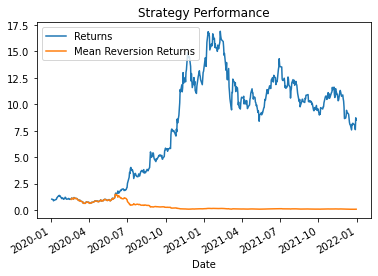

In [445]:
#Plotting the Cummulative Returns.
(nio_df['Returns'] + 1).cumprod().plot()
(nio_df['Mean Reversion Returns'] + 1).cumprod().plot()
plt.legend()
plt.title("Strategy Performance")


<b>Unfortunately, the mean reversion strategy SEVERELY underperformed. 

This is completely fine, and it gives me insight on what I should have modified or what other strategy I could have used. I'm still learning more about different trading strategies, so I hope to implement another one soon. Nio was an interesting stock to work with, so hopefully I can work towards making a better strategy for it. Some strategies that I have looked into now include momentum, pairs trading, and support and resistance levels.

<B>Closing Notes

Overall, I enjoyed completing this project as it gave me a better understanding of trading terminology and practices. While the mean reversion strategy did not perform well, I am glad that I was able to learn it and implement it with Python code. I look forward to working on more projects like this in the future.